In [1]:
# extension to beautify the code
%load_ext lab_black

# Problem Statement

#### Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health.

## Importing the Libraries

#### About the Librarie used below
<font color="rgba(0,0,0,0.5)"><strong>Numpy</strong></font>&emsp;is useful for performing any mathematical or scientific calculation <br>
<font color="rgba(0,0,0,0.5)"><strong>Pandas</strong></font>&emsp;is Machine Learning which is used for data cleaning and analysis. It has features which are used for exploring, cleaning, transforming and visualizing from data <br>
<font color="rgba(0,0,0,0.5)"><strong>Matplotlib</strong></font>&emsp;is the popular data visualizing library <br>
<font color="rgba(0,0,0,0.5)"><strong>Seaborn</strong></font>&emsp;is also the visualization tool which provides the extended features to the matplotlib library<br>
<font color="rgba(0,0,0,0.5)"><strong>Sklearn</strong></font>&emsp;is a python library that provides wide range of machine learning algorithms <br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings

warnings.filterwarnings("ignore")

### Importing the dataset for the project

#### Description of the dataset
<table style="border-style:hidden;border-collapse:collapse;">
    <tr> 
        <th>
            Attribute/Variable
        </th>
        <th>
            Description
        </th>
    </tr>
    <tr>
        <td>age</td>
        <td>Age in years</td>
    </tr>
    <tr>
        <td>sex</td>
        <td>1 = male; 0 = female</td>
    </tr>
    <tr>
        <td>cp</td>
        <td>Chest pain type</td>
    </tr>
    <tr>
        <td>trestbps</td>
        <td>Resting blood pressure (in mm Hg on admission to the hospital)</td>
    </tr>
    <tr>
        <td>chol</td>
        <td>Serum cholesterol in mg/dl</td>
    </tr>
    <tr>
        <td>fbs</td>
        <td>Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</td>
    </tr>
    <tr>
        <td>restecg</td>
        <td>Resting electrocardiographic results</td>
    </tr>
    <tr>
        <td>thalach</td>
        <td>Maximum heart rate achieved</td>
    </tr>
    <tr>
        <td>exang</td>
        <td>Exercise induced angina (1 = yes; 0 = no)</td>
    </tr>
    <tr>
        <td>oldpeak</td>
        <td>ST depression induced by exercise relative to rest</td>
    </tr>
    <tr>
        <td>slope</td>
        <td>Slope of the peak exercise ST segment</td>
    </tr>
    <tr>
        <td>ca</td>
        <td>Number of major vessels (0-3) colored by fluoroscopy</td>
    </tr>
    <tr>
        <td>thal</td>
        <td>3 = normal; 6 = fixed defect; 7 = reversible defect</td>
    </tr>
    <tr>
        <td>target</td>
        <td>1 or 0</td>
    </tr>
</table>

In [3]:
df = pd.read_excel("cep1_dataset.xlsx")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### There are no missing values inthe dataset

In [9]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

#### Since the diffference between the target values is not great we can say that it is the good balanced dataset

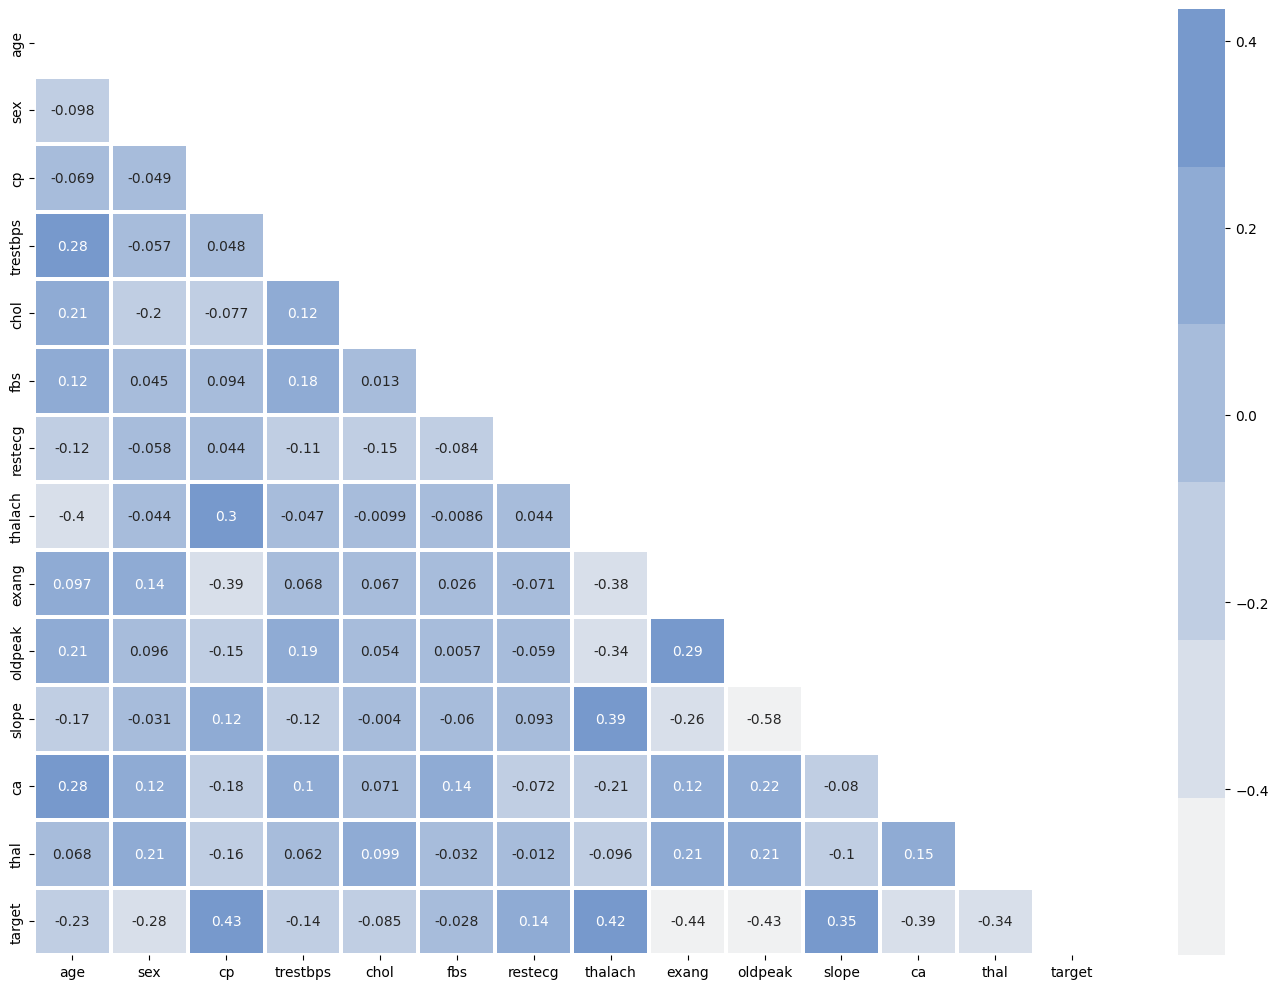

In [41]:
df_corr = df.corr()
matrix = np.triu(np.ones_like(df_corr, dtype=bool))
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    linewidth=1.5,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    mask=matrix,
    cmap=sns.light_palette("#79C"),
)

plt.tight_layout()

***There is a high positive correlation between the cp and target is high i.e., higher the chest pain higher the chance for the heart disease<br>
There is high negative correlation between the exang and the target variable ***

In [10]:
df_continuous = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_continuous

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


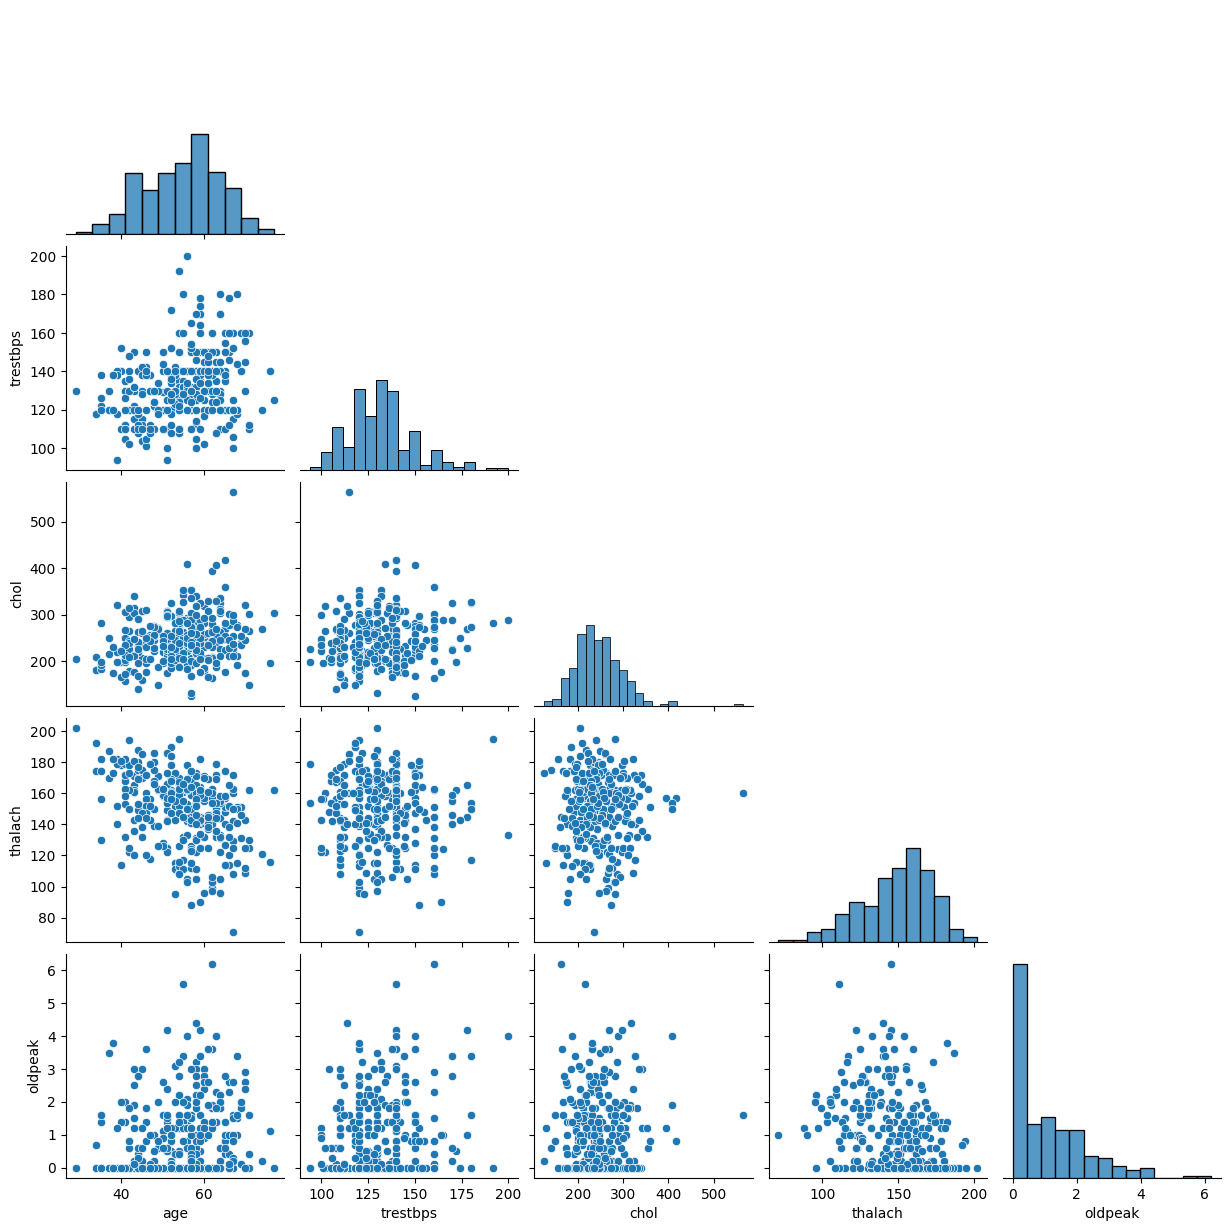

In [42]:
sns.pairplot(df_continuous, corner=True)

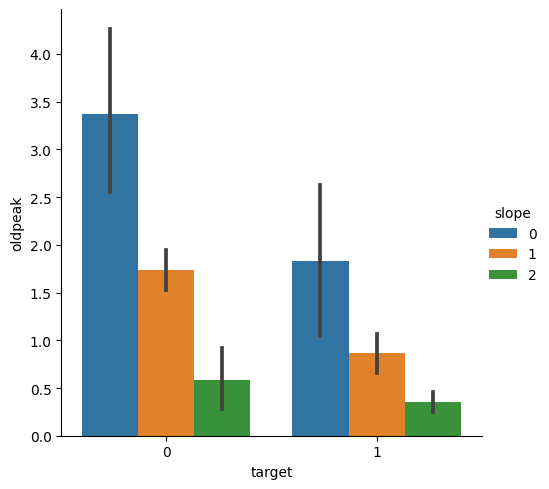

In [13]:
sns.catplot(data=df, x="target", y="oldpeak", hue="slope", kind="bar")

<Axes: xlabel='target', ylabel='oldpeak'>

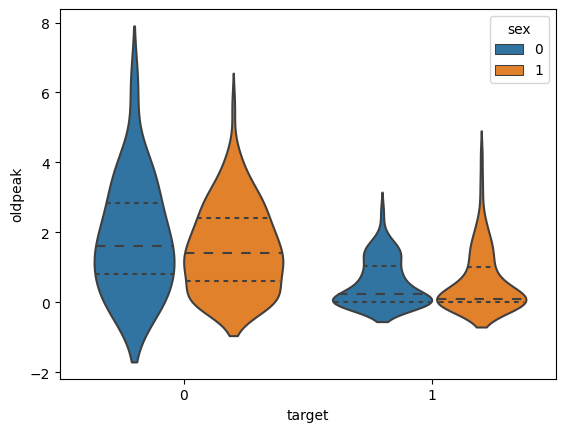

In [14]:
sns.violinplot(x="target", y="oldpeak", hue="sex", inner="quartile", data=df)

<Axes: xlabel='target', ylabel='thalach'>

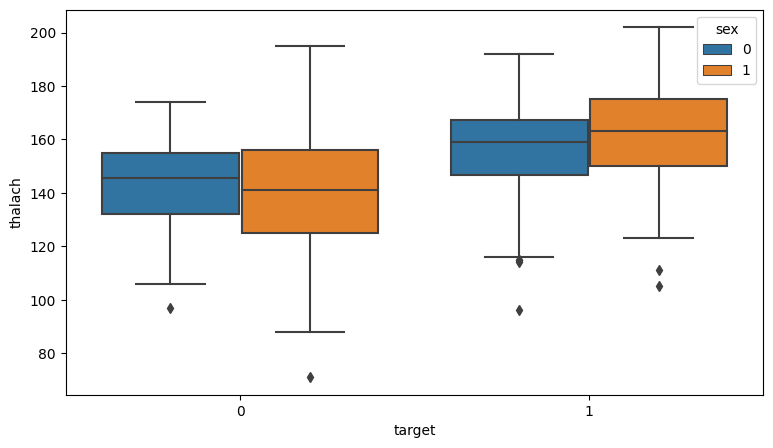

In [15]:
plt.figure(figsize=(9, 5))
sns.boxplot(x="target", y="thalach", hue="sex", data=df)

In [16]:
p_data = df[df["target"] == 1]
p_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [17]:
n_data = df[df["target"] == 0]
n_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
print("positive patients depression: {}".format(p_data["oldpeak"].mean()))
print("neagative patients depression: {}".format(n_data["oldpeak"].mean()))

positive patients depression: 0.583030303030303
neagative patients depression: 1.5855072463768116


In [19]:
print("positive patients Maximum heart rate : {}".format(p_data["thalach"].mean()))
print("neagative patients Maximum heart rate : {}".format(n_data["thalach"].mean()))

positive patients Maximum heart rate : 158.46666666666667
neagative patients Maximum heart rate : 139.1014492753623


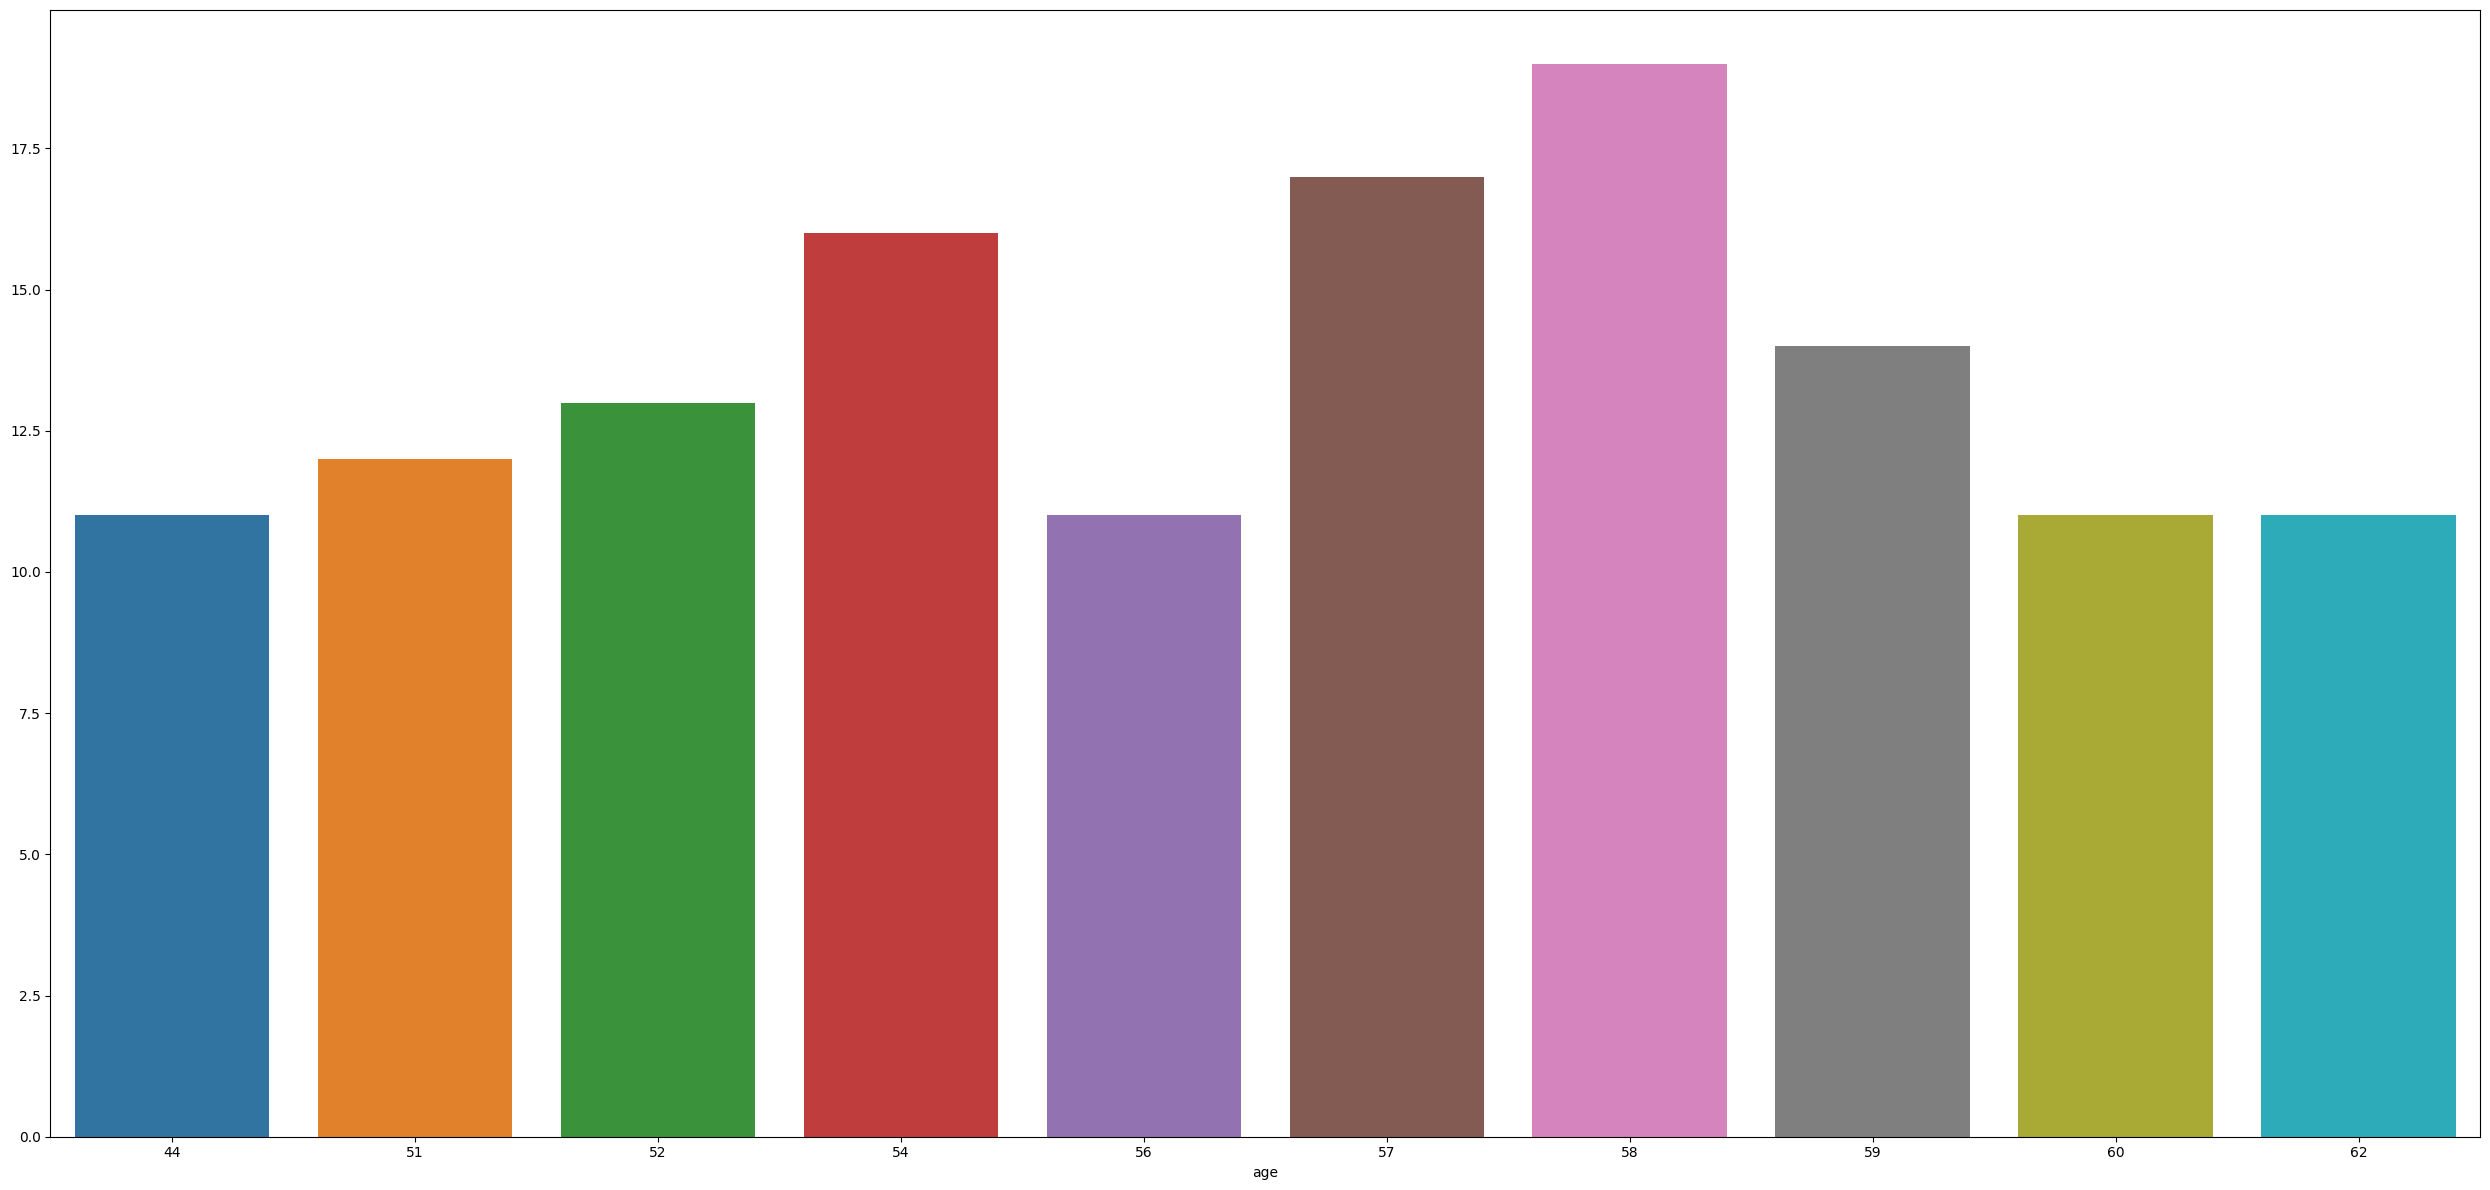

In [20]:
plt.figure(figsize=(25, 12))
sns.barplot(x=df.age.value_counts()[:10].index, y=df.age.value_counts()[:10].values)
plt.tight_layout()

## Splitting the data

In [21]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## LogisticRegression 

In [23]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [24]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [25]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred) * 100))

[[20 10]
 [ 5 26]]
Accuracy Scaore is : 75.41


## KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred2 = knn.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [28]:
print(confusion_matrix(y_test, y_pred2))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred2) * 100))

[[21  9]
 [ 6 25]]
Accuracy Scaore is : 75.41


## SUPPORT VECTOR MACHINE SVC

In [29]:
svc = SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

In [30]:
y_pred3 = svc.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [31]:
print(confusion_matrix(y_test, y_pred3))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred3) * 100))

[[20 10]
 [ 4 27]]
Accuracy Scaore is : 77.05


## GaussianNB

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred4 = gnb.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [34]:
print(confusion_matrix(y_test, y_pred4))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred4) * 100))

[[22  8]
 [ 4 27]]
Accuracy Scaore is : 80.33


## DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [36]:
y_pred5 = dt.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        30
           1       0.69      0.71      0.70        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [37]:
print(confusion_matrix(y_test, y_pred5))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred5) * 100))

[[20 10]
 [ 9 22]]
Accuracy Scaore is : 68.85


## RandomForestClassifier

In [38]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [39]:
y_pred6 = rf.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [40]:
print(confusion_matrix(y_test, y_pred6))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred6) * 100))

[[21  9]
 [ 3 28]]
Accuracy Scaore is : 80.33


## XGBClassifier

In [41]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [42]:
y_pred7 = xgb.predict(X_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [43]:
print(confusion_matrix(y_test, y_pred7))
print("Accuracy Scaore is : {:.02f}".format(accuracy_score(y_test, y_pred7) * 100))

[[22  8]
 [ 4 27]]
Accuracy Scaore is : 80.33


In [44]:
rf.feature_importances_

array([0.07813526, 0.04206087, 0.16579998, 0.07476748, 0.0758662 ,
       0.00827565, 0.02013861, 0.12772212, 0.06949599, 0.09956583,
       0.04677439, 0.11666925, 0.07472838])

<Axes: >

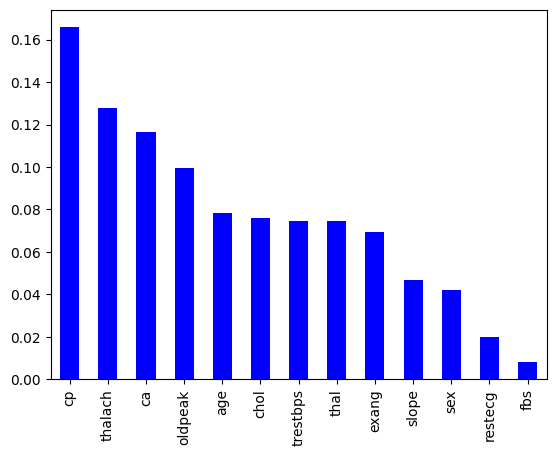

In [45]:
index = df.columns[:-1]
importance = pd.Series(rf.feature_importances_, index=index)
importance.nlargest(13).plot(kind="bar", colormap="winter")